In [1]:
#%matplotlib notebook
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

grad_data = pd.read_csv("Admission_Predict_Ver1.1.csv")
grad_data = grad_data.rename(columns={"University Rating": "university_rating", 
                                      "Chance of Admit ":"chance_of_admit", 
                                      "Serial No.":"serial_no",
                                     "GRE Score":"gre_score",
                                     "TOEFL Score":"toefl_score",
                                     "LOR ":"lor",
                                     "SOP":"sop",
                                     "Research":"research",
                                      "CGPA":"cgpa"})
                                
grad_data.head()

,serial_no,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
grad_data = grad_data.drop(columns=["serial_no"])


In [3]:
grad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
gre_score            500 non-null int64
toefl_score          500 non-null int64
university_rating    500 non-null int64
sop                  500 non-null float64
lor                  500 non-null float64
cgpa                 500 non-null float64
research             500 non-null int64
chance_of_admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


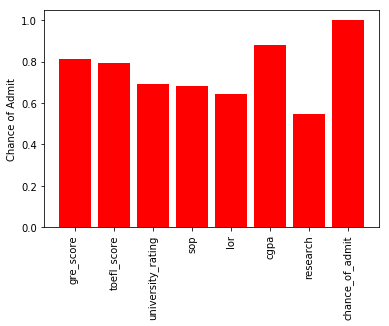

gre_score            0.810351
toefl_score          0.792228
university_rating    0.690132
sop                  0.684137
lor                  0.645365
cgpa                 0.882413
research             0.545871
chance_of_admit      1.000000
Name: chance_of_admit, dtype: float64


In [6]:
correlation = grad_data.corr()["chance_of_admit"]
plt.bar(grad_data.columns, correlation, color="r")
plt.xticks(grad_data.columns, rotation= "vertical")
plt.ylabel("Chance of Admit")
plt.savefig("grad_data_Corr_bar_chart.png")
plt.show()

print(correlation)

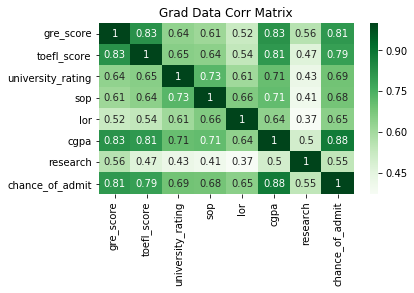

In [30]:
#Identify how features are correlated to each other
correlation2 = grad_data.corr()
# Plotting heatmap
sns.heatmap(correlation2, annot=True, cmap='Greens')
plt.tight_layout()
plt.title("Grad Data Corr Matrix")
plt.savefig("grad_data_Corr_matrix.png")

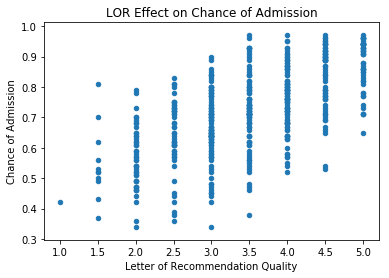

In [6]:
grad_data.plot(kind="scatter",x="lor",y="chance_of_admit" )
plt.xlabel("Letter of Recommendation Quality")
plt.ylabel("Chance of Admission")
plt.title("LOR Effect on Chance of Admission")
plt.savefig("LOR Effect on Chance of Admission")

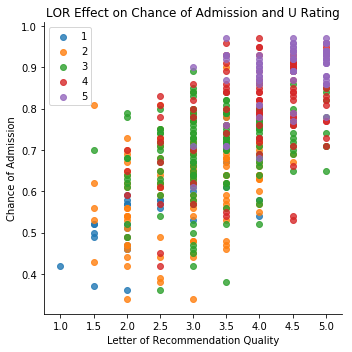

In [7]:
sns.lmplot(x="lor",y="chance_of_admit",fit_reg=False,data=grad_data,hue="university_rating", legend = False)
plt.xlabel("Letter of Recommendation Quality")
plt.ylabel("Chance of Admission")
plt.title("LOR Effect on Chance of Admission and U Rating")
plt.tight_layout()
plt.legend(loc= "best")
plt.savefig("LOR Effect on Chance of Admission and U Rating.png")

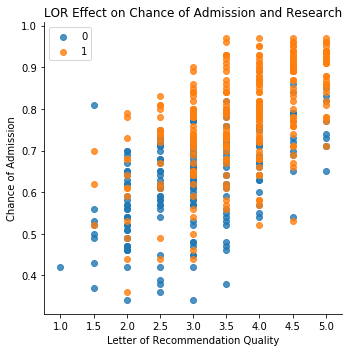

In [8]:
sns.lmplot(x="lor",y="chance_of_admit",fit_reg=False,data=grad_data,hue="research", legend = False)
plt.xlabel("Letter of Recommendation Quality")
plt.ylabel("Chance of Admission")
plt.title("LOR Effect on Chance of Admission and Research")
plt.tight_layout()
plt.legend(loc= "best")
plt.savefig("LOR Effect on Chance of Admission and Research.png")

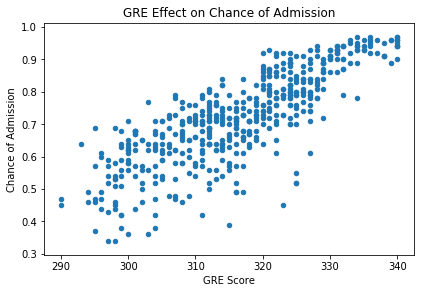

In [9]:
grad_data.plot(kind="scatter",x="gre_score",y="chance_of_admit" )
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")
plt.tight_layout()
#plt.legend(loc= "best")
plt.title("GRE Effect on Chance of Admission")
plt.savefig("GRE Effect on Chance of Admission.png")

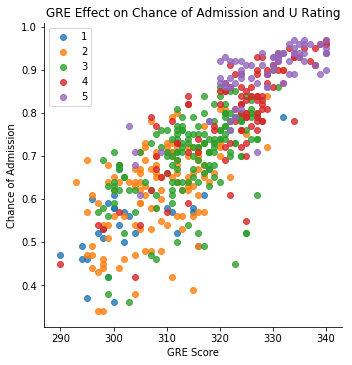

In [10]:
sns.lmplot(x="gre_score",y="chance_of_admit",fit_reg= False,data=grad_data,hue="university_rating", legend = False)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")
plt.tight_layout()
plt.legend(loc= "best")
plt.title("GRE Effect on Chance of Admission and U Rating")

plt.savefig("GRE Effect on Chance of Admission and U Rating.png")

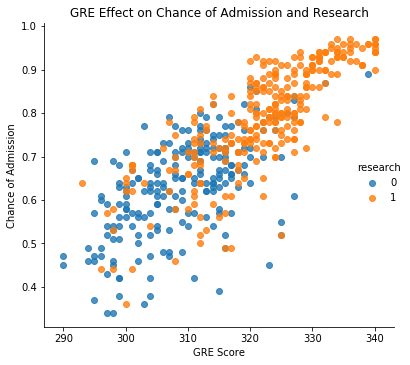

In [11]:
sns.lmplot(x="gre_score",y="chance_of_admit",fit_reg=False,data=grad_data,hue="research")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")
plt.tight_layout()
#plt.legend(loc= "best")
plt.title("GRE Effect on Chance of Admission and Research")
plt.savefig("GRE Effect on Chance of Admission and Research.png")

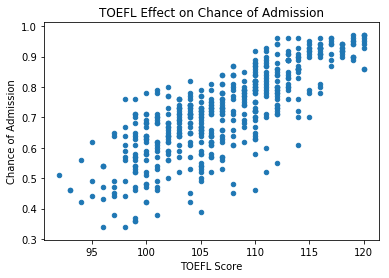

In [12]:
grad_data.plot(kind="scatter",x="toefl_score",y="chance_of_admit" )
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admission")
plt.title("TOEFL Effect on Chance of Admission")
plt.savefig("TOEFL Effect on Chance of Admission.png")

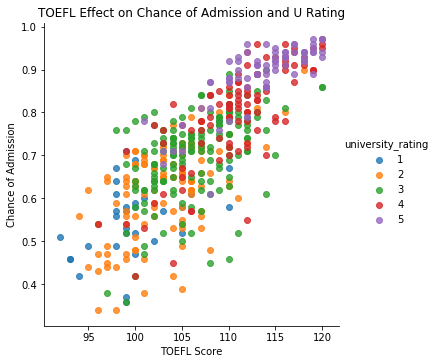

In [13]:
sns.lmplot(x="toefl_score",y="chance_of_admit",fit_reg=False,data=grad_data,hue="university_rating")
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admission")
plt.title("TOEFL Effect on Chance of Admission and U Rating")
plt.savefig("TOEFL Effect on Chance of Admission and U Rating.png")

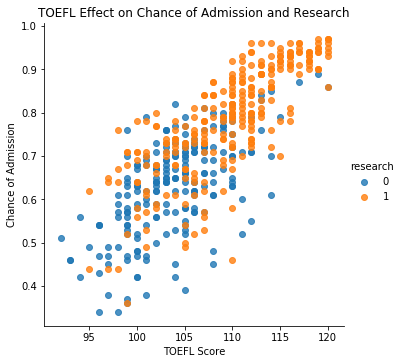

In [14]:
sns.lmplot(x="toefl_score",y="chance_of_admit",fit_reg=False,data=grad_data,hue="research")
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admission")
plt.title("TOEFL Effect on Chance of Admission and Research")
plt.savefig("TOEFL Effect on Chance of Admission and Research.png")

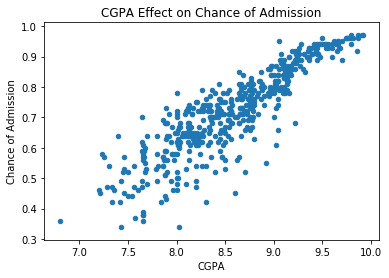

In [15]:
grad_data.plot(kind="scatter",x="cgpa",y="chance_of_admit" )
plt.xlabel("CGPA")
plt.ylabel("Chance of Admission")
plt.title("CGPA Effect on Chance of Admission")
plt.savefig("CGPA Effect on Chance of Admission.png")

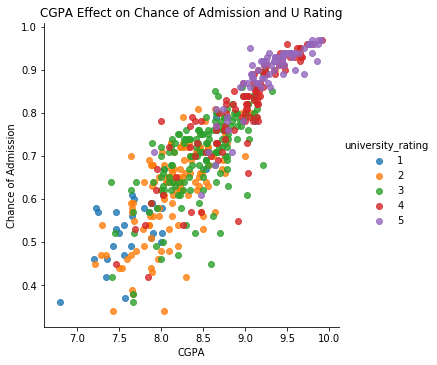

In [16]:
sns.lmplot(x="cgpa",y="chance_of_admit",fit_reg=False,data=grad_data,hue="university_rating")
plt.xlabel("CGPA")
plt.ylabel("Chance of Admission")
plt.title("CGPA Effect on Chance of Admission and U Rating")
plt.savefig("CCGPA Effect on Chance of Admission and U Rating.png")

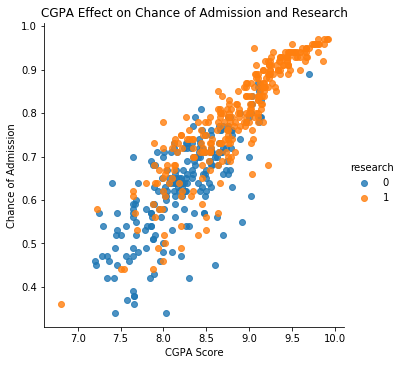

In [17]:
sns.lmplot(x="cgpa",y="chance_of_admit",fit_reg=False,data=grad_data,hue="research")
plt.xlabel("CGPA Score")
plt.ylabel("Chance of Admission")
plt.title("CGPA Effect on Chance of Admission and Research")
plt.savefig("CGPA Effect on Chance of Admission and Research.png")

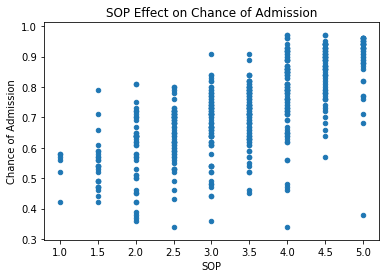

In [18]:
grad_data.plot(kind="scatter",x="sop",y="chance_of_admit" )
plt.xlabel("SOP")
plt.ylabel("Chance of Admission")
plt.title("SOP Effect on Chance of Admission")
plt.savefig("SOP Effect on Chance of Admission.png")

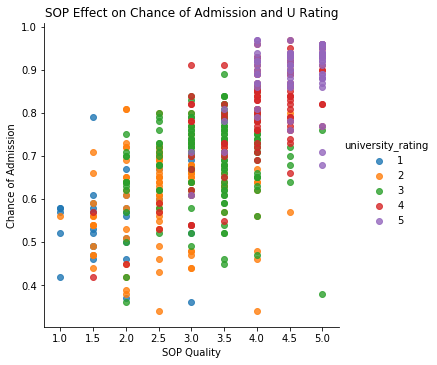

In [19]:
sns.lmplot(x="sop",y="chance_of_admit",fit_reg=False,data=grad_data,hue="university_rating")
plt.xlabel("SOP Quality")
plt.ylabel("Chance of Admission")
plt.title("SOP Effect on Chance of Admission and U Rating")
plt.savefig("SOP Effect on Chance of Admission and U Rating.png")

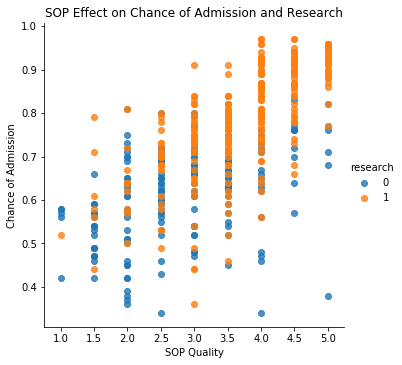

In [20]:
sns.lmplot(x="sop",y="chance_of_admit",fit_reg=False,data=grad_data,hue="research")
plt.xlabel("SOP Quality")
plt.ylabel("Chance of Admission")
plt.title("SOP Effect on Chance of Admission and Research")
plt.savefig("SOP Effect on Chance of Admission and Research.png")

In [21]:
grad_data.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
grad_data_ratings = grad_data[["university_rating","chance_of_admit"]]
grad_data_ratings.head()

,university_rating,chance_of_admit
0,4,0.92
1,4,0.76
2,3,0.72
3,3,0.80
4,2,0.65


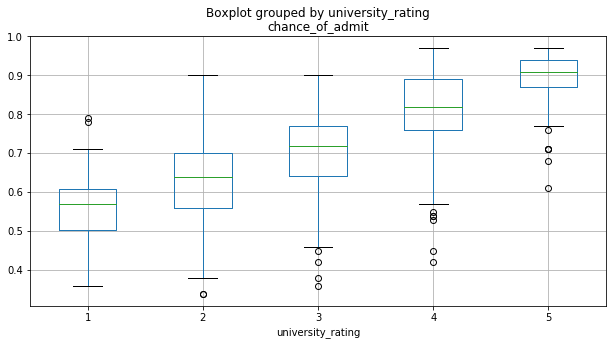

In [23]:
grad_data_ratings.boxplot("chance_of_admit", by="university_rating", figsize=(10, 5))
plt.savefig("ratings_anova.png")

In [24]:
rating1 = grad_data_ratings[grad_data_ratings["university_rating"] == 1]["chance_of_admit"]
rating2 = grad_data_ratings[grad_data_ratings["university_rating"] == 2]["chance_of_admit"]
rating3 = grad_data_ratings[grad_data_ratings["university_rating"] == 3]["chance_of_admit"]
rating4 = grad_data_ratings[grad_data_ratings["university_rating"] == 4]["chance_of_admit"]
rating5 = grad_data_ratings[grad_data_ratings["university_rating"] == 5]["chance_of_admit"]

In [25]:
stats.f_oneway(rating1, rating2, rating3, rating4, rating5)

F_onewayResult(statistic=114.00804341400004, pvalue=7.753395328023128e-69)

The P-value is 7.75 so we will reject null hypothesis.  This means that the difference in admission between rating groups differs significantly from the difference in admission between members within in each rating group.

In [26]:
grad_data_research = grad_data[["research","chance_of_admit"]]
grad_data_research.head()

,research,chance_of_admit
0,1,0.92
1,1,0.76
2,1,0.72
3,1,0.80
4,0,0.65


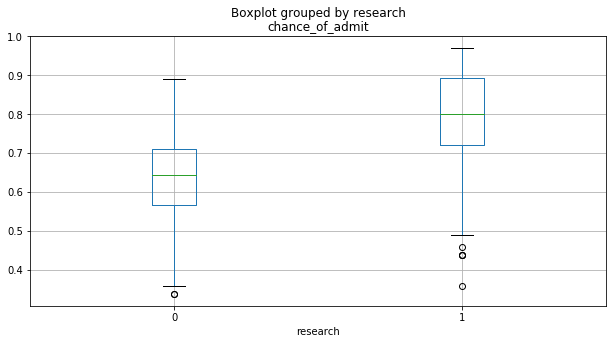

In [27]:
grad_data_research.boxplot("chance_of_admit", by="research", figsize=(10, 5))
plt.savefig("research_anova.png")

In [28]:
research1 = grad_data_research[grad_data_research["research"] == 1]["chance_of_admit"]
research0 = grad_data_research[grad_data_research["research"] == 0]["chance_of_admit"]

In [29]:
stats.f_oneway(research1, research0)

F_onewayResult(statistic=211.37662941712796, pvalue=3.5954935458406797e-40)